298
0.04975060746073723
0.027920184656977654
0.04683242738246918
0.04723965376615524
0.04240651801228523
0.027620378881692886
0.042560726404190063
0.03922421485185623
0.04090031236410141
0.04382285475730896
0.027714285999536514
0.028014400973916054
0.04177497699856758
0.04716700315475464
0.02830134518444538
0.04849506542086601
0.04675648733973503
0.04136057198047638
0.0483100451529026
0.046035993844270706
0.04144524782896042
0.049848560243844986
0.029826166108250618
0.046405401080846786
0.028974145650863647
0.030273841693997383
0.04863899573683739
0.04887283965945244
0.04749530553817749
0.025340767577290535
0.039208099246025085
0.04569341614842415
0.027179842814803123
0.03209367394447327
0.024976585060358047
0.02467278577387333
0.02844986319541931
0.024824703112244606
0.023657314479351044
0.018525131046772003
0.025044502690434456
0.0433003269135952
0.04083092883229256
0.03978336974978447
0.048381511121988297
0.04445682838559151
0.04707486182451248
0.038547083735466
0.04249908775091171


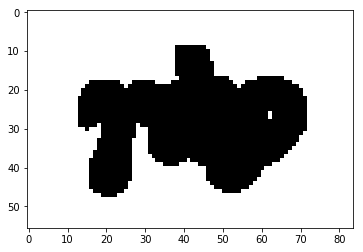

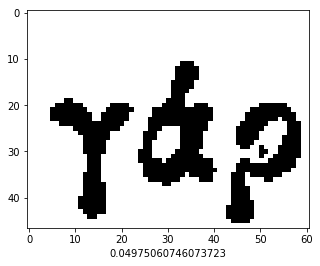

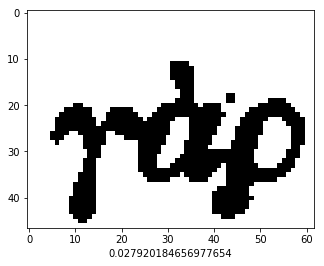

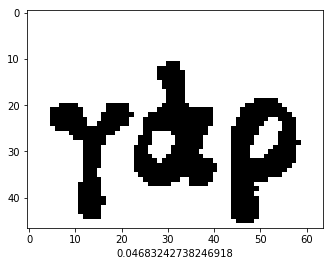

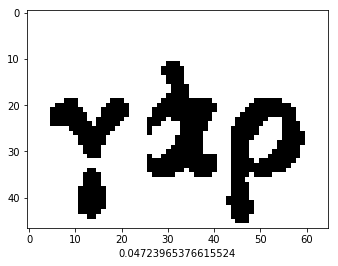

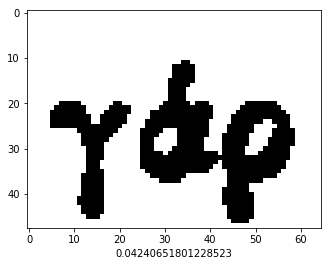

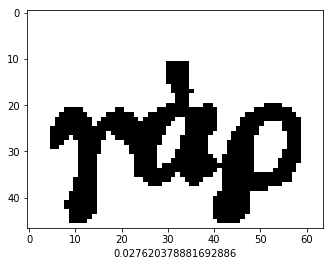

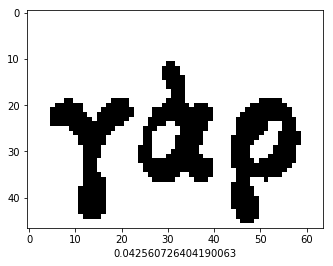

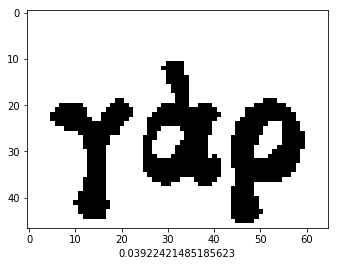

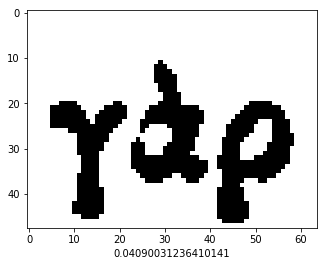

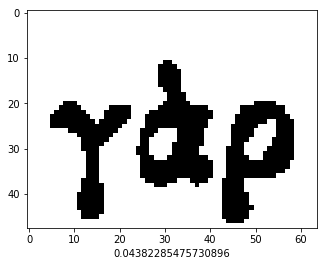

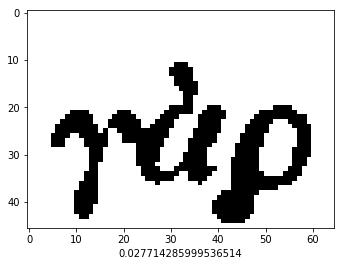

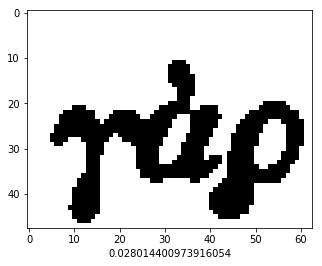

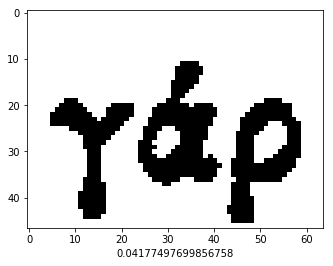

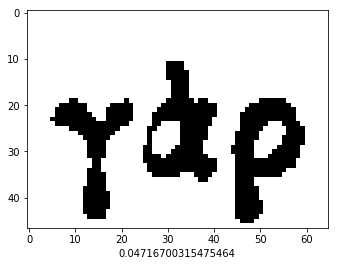

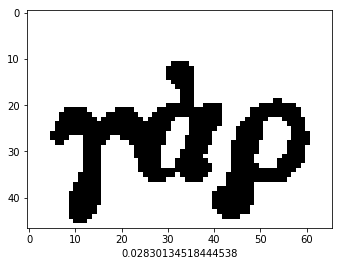

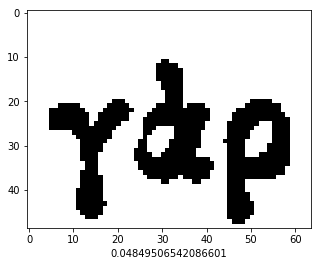

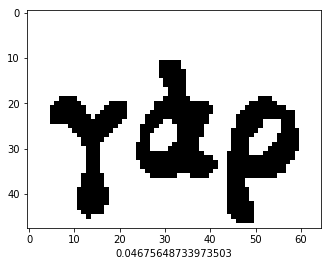

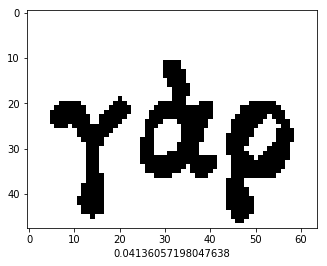

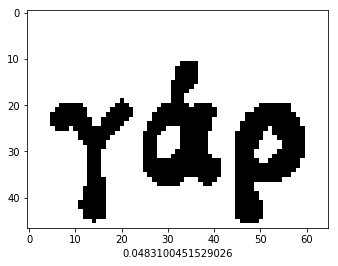

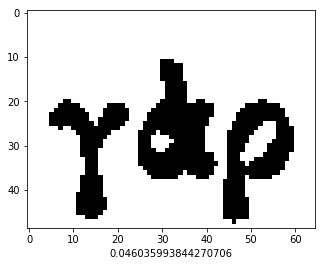

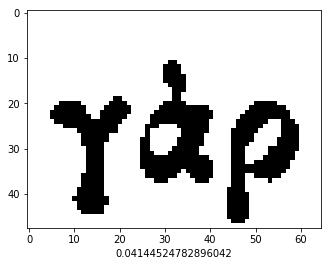

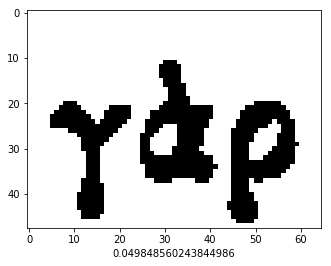

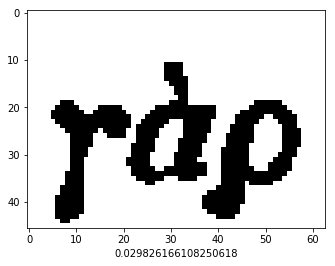

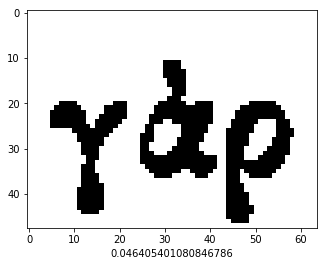

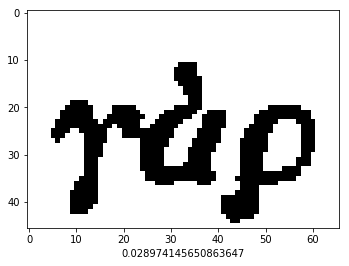

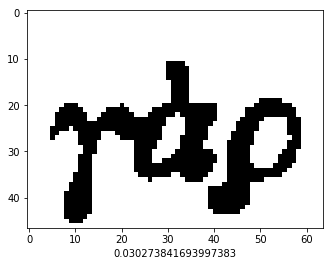

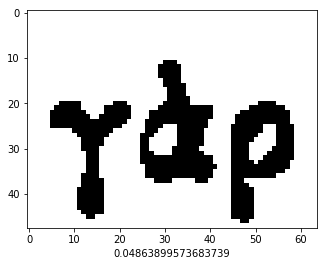

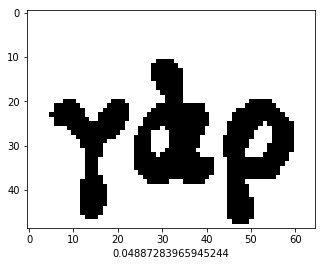

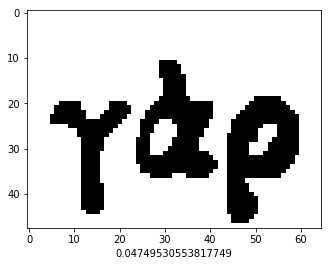

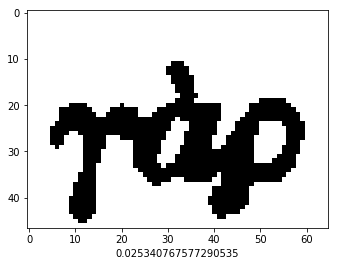

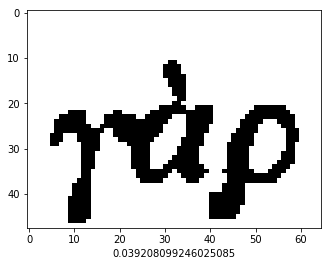

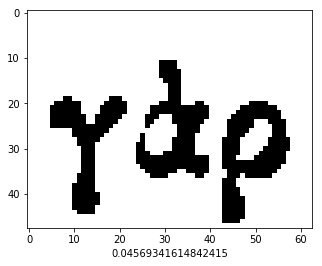

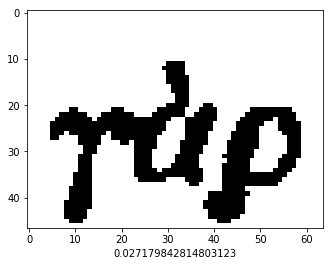

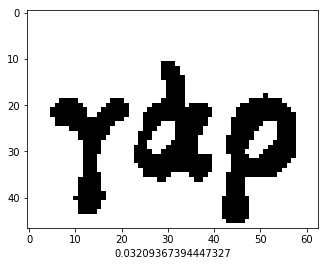

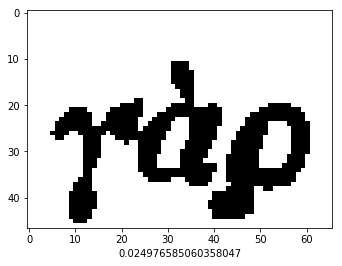

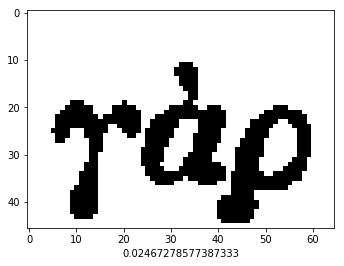

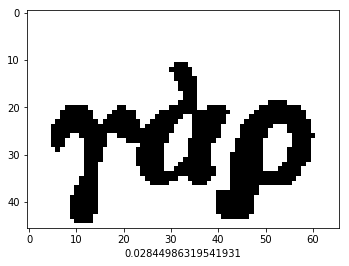

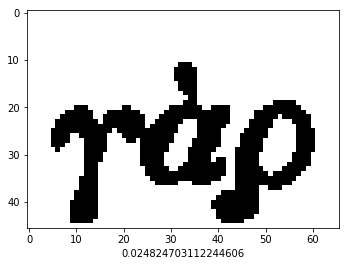

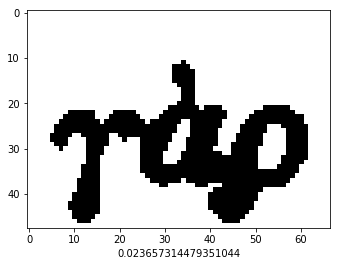

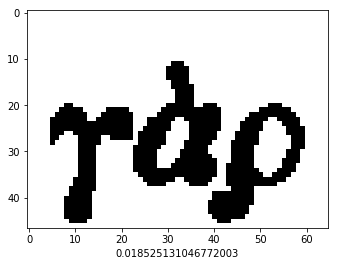

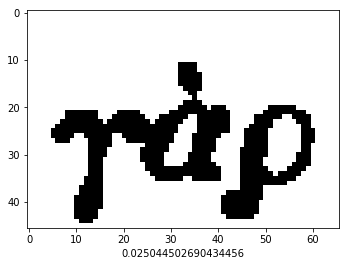

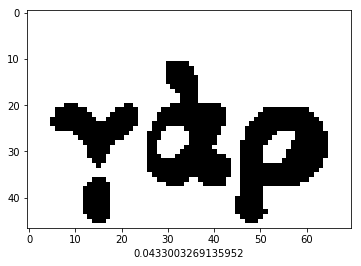

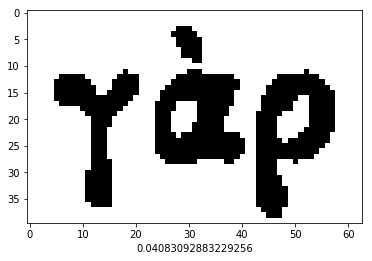

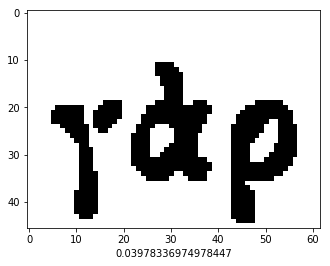

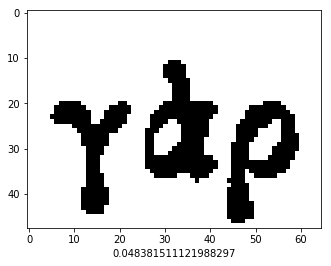

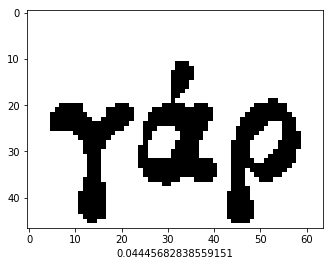

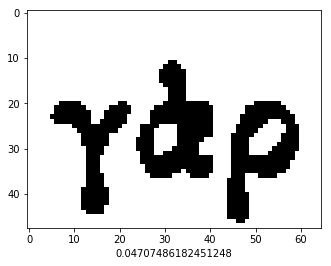

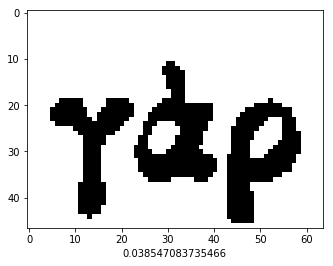

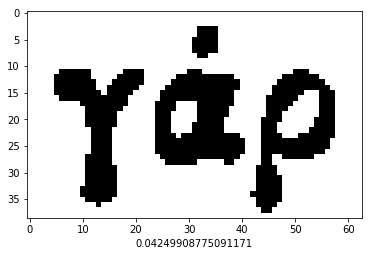

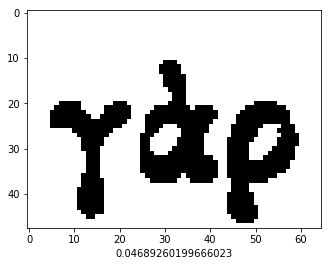

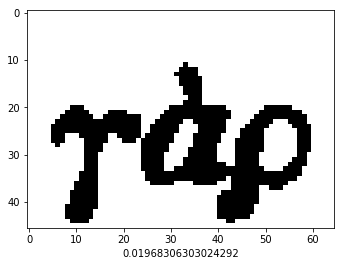

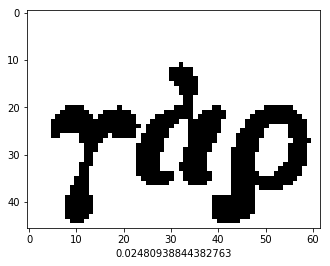

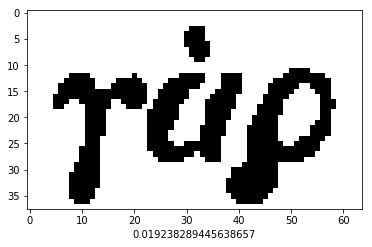

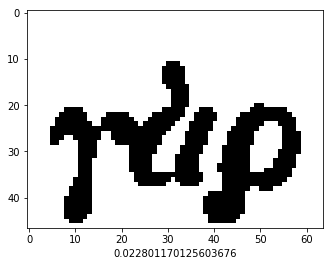

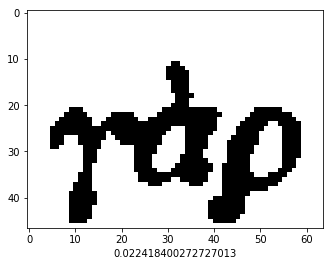

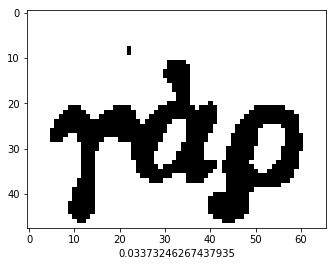

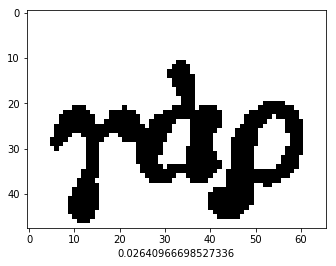

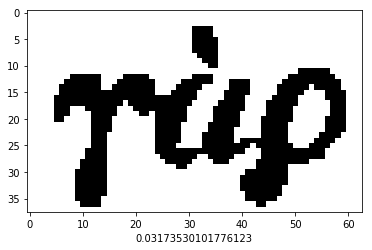

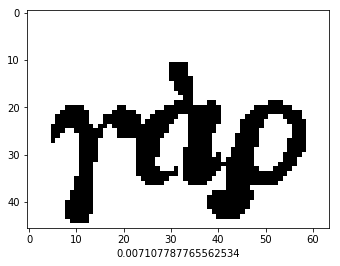

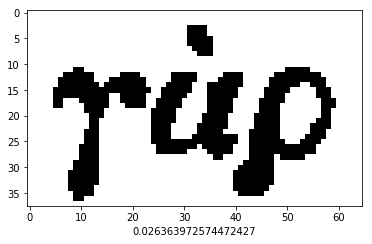

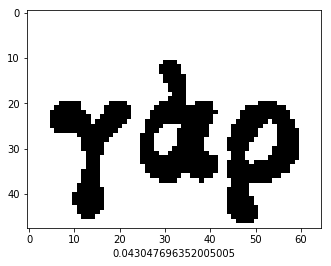

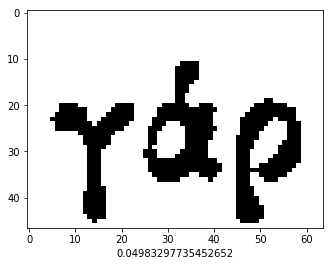

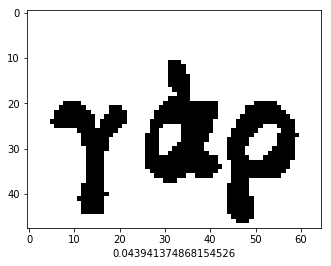

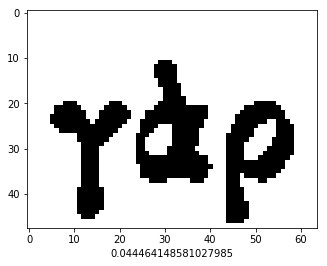

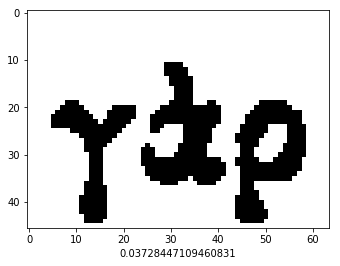

In [15]:
import cv2 as cv2  
from matplotlib import pyplot as plt
import numpy as np

 

def createPadding(img, margin):
    w=img.shape[1]
    #print(w)
    for i in range(10):
        img = np.insert(img, w, values=255, axis=1)

    for i in range(10):
        img = np.insert(img, 0, values=255, axis=1)    
    
    h=img.shape[0]
    #print(w)
    for i in range(10):
        img = np.insert(img, h, values=255, axis=0)
    
    for i in range(10):
        img = np.insert(img, 0, values=255, axis=0)
    
    
    return img

#words=['word/pneuma.png','word/patera.png']

#for word in words:



kernel=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(6,6))
#kernel=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(6,3))
#kernel = np.ones((7,7),np.uint8)
#kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (8, 12));

imgQ= cv2.imread("word/gar.png",0);  
imgQ=createPadding(imgQ, 20)       
imgQ = cv2.erode(imgQ, kernel, iterations=1)

_, QueryContours, _ = cv2.findContours(imgQ, cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)


plt.figure()
plt.imshow(imgQ, cmap='gray')       

count=0  
files = [line.rstrip() for line in open("word/gar.png.txt", 'r')]
print(len(files))
for word in files: 
    
    #print(word)
    count=count+1
    if count>0 and count<298:
        img= cv2.imread(word,0);
        imgO=img.copy()
        img=createPadding(img, 20)
        img = cv2.erode(img, kernel, iterations=1)
        
        _, DataContours, _ = cv2.findContours(img, cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
        
        sd = cv2.createShapeContextDistanceExtractor() 
        abc = sd.computeDistance(QueryContours[1],DataContours[1])
        if abc < 0.05:
            print(abc)
            plt.figure()
            plt.xlabel(abc)
            plt.imshow(imgO, cmap='gray')

        
        
#img = cv2.dilate(img, kernel, iterations=1)        
#print(len(DataContours))

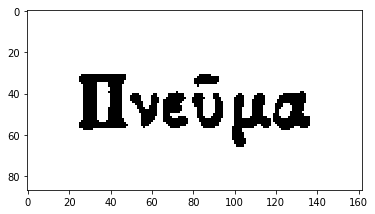

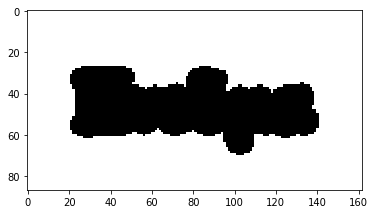

In [16]:
#Pattern Recognition and Artificial Intelligence Techniques for Cultural Heritage special issue
import cv2 as cv2  
from matplotlib import pyplot as plt
import numpy as np


def createPadding(query, margin):
    #size=np.size(query)
    #query = np.insert(query, w, values=0, axis=1)
    #create horizontal space
    w=query.shape[0]
    x=np.zeros(shape=(w, margin))
    x.fill(255)
    #x.astype(int)
    query = np.hstack((query, x))
    query = np.hstack((x,query))
    
    h=query.shape[1]
    y=np.zeros(shape=(margin, h))
    y.fill(255)
    query = np.vstack((query, y))
    query = np.vstack((y,query))

    return query
 


def applyCircleErosion(word_img):
    kernel=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(9,9))
    erode_img = cv2.erode(word_img, kernel, iterations=1)
    return erode_img

#===============================
#img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#img= cv2.imread("tmp1/kyrios4.png",0);
#img= cv2.imread("tmp1/kyriosa1.png",0);



img= cv2.imread("word/patros.png",0);
img= cv2.imread("word/kyrios.png",0);
img= cv2.imread("word/fos.png",0);
img= cv2.imread("word/pneumatos.png",0);
img= cv2.imread("test/0164.pdf300/591-208-122-37.png",0);

img=createPadding(img, 20)

plt.figure()
plt.imshow(img, cmap='gray')

img=applyCircleErosion(img)


plt.figure()
plt.imshow(img, cmap='gray')


